In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import anndata as ad

In [24]:
import os
print(os.listdir("3dpi")) # for checking

['barcodes.tsv.gz', 'features.tsv.gz', 'matrix.mtx.gz']


In [25]:
mock_adata = sc.read_10x_mtx("mock")
day_one   = sc.read_10x_mtx("1dpi")
day_two   = sc.read_10x_mtx("2dpi")
day_three = sc.read_10x_mtx("3dpi")

print("Mock shape:", mock_adata.shape)
print("1 dpi shape:", day_one.shape)
print("2 dpi shape:", day_two.shape)
print("3 dpi shape:", day_three.shape)


Mock shape: (22609, 33539)
1 dpi shape: (11834, 33539)
2 dpi shape: (14695, 33539)
3 dpi shape: (28530, 33539)


In [46]:
# Tagging the cells
mock_adata.obs["condition"] = "mock"
day_one.obs["condition"] = "1dpi"
day_two.obs["condition"] = "2dpi"
day_three.obs["condition"] = "3dpi"

print(mock_adata)
print(day_one)
print(day_two)
print(day_three)

AnnData object with n_obs × n_vars = 22608 × 21691
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO', 'log1p_total_counts_RIBO', 'pct_counts_RIBO', 'total_counts_HB', 'log1p_total_counts_HB', 'pct_counts_HB', 'n_genes', 'condition'
    var: 'gene_ids', 'feature_types', 'MT', 'RIBO', 'HB', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
AnnData object with n_obs × n_vars = 11829 × 21983
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', '

In [26]:
# Make gene/cell names unique to avoid confusion
mock_adata.var_names_make_unique()
mock_adata.obs_names_make_unique()
day_one.var_names_make_unique()
day_one.obs_names_make_unique()
day_two.var_names_make_unique()
day_two.obs_names_make_unique()
day_three.var_names_make_unique()
day_three.obs_names_make_unique()

In [28]:
# Checked for MT, RIBO, and HB genes
# mock
mock_adata.var['MT'] = mock_adata.var_names.str.startswith(("MT-"))
mock_adata.var['RIBO'] = mock_adata.var_names.str.startswith(("RPS", "RPL"))
mock_adata.var['HB'] = mock_adata.var_names.str.startswith(("HB","HBA","HBB"))

# day one
day_one.var['MT'] = day_one.var_names.str.startswith(("MT-"))
day_one.var['RIBO'] = day_one.var_names.str.startswith(("RPS", "RPL"))
day_one.var['HB'] = day_one.var_names.str.startswith(("HB","HBA","HBB"))

# day two
day_two.var['MT'] = day_two.var_names.str.startswith(("MT-"))
day_two.var['RIBO'] = day_two.var_names.str.startswith(("RPS", "RPL"))
day_two.var['HB'] = day_two.var_names.str.startswith(("HB","HBA","HBB"))

# day three
day_three.var['MT'] = day_three.var_names.str.startswith(("MT-"))
day_three.var['RIBO'] = day_three.var_names.str.startswith(("RPS", "RPL"))
day_three.var['HB'] = day_three.var_names.str.startswith(("HB","HBA","HBB"))

In [29]:
# QC Metrics

# mock
sc.pp.calculate_qc_metrics(mock_adata, qc_vars=['MT', 'RIBO', 'HB'], inplace=True, log1p=True)

# day one
sc.pp.calculate_qc_metrics(day_one, qc_vars=['MT', 'RIBO', 'HB'], inplace=True, log1p=True)

# day two
sc.pp.calculate_qc_metrics(day_two, qc_vars=['MT', 'RIBO', 'HB'], inplace=True, log1p=True)

# day three
sc.pp.calculate_qc_metrics(day_three, qc_vars=['MT', 'RIBO', 'HB'], inplace=True, log1p=True)


In [30]:
datasets = {
    "mock": mock_adata,
    "1dpi": day_one,
    "2dpi": day_two,
    "3dpi": day_three
}

for name, adata in datasets.items():
    print(name, ":", adata.obs.columns)
    print(name, ":", adata.var.columns)


mock : Index(['n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
       'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_MT',
       'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO',
       'log1p_total_counts_RIBO', 'pct_counts_RIBO', 'total_counts_HB',
       'log1p_total_counts_HB', 'pct_counts_HB'],
      dtype='object')
mock : Index(['gene_ids', 'feature_types', 'MT', 'RIBO', 'HB', 'n_cells_by_counts',
       'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts',
       'total_counts', 'log1p_total_counts'],
      dtype='object')
1dpi : Index(['n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
       'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_MT',
       'log1p_total_counts_MT', 'pct_cou

In [31]:
plt.rcParams["figure.figsize"] = (3,2) #figure size adjustment
plt.rcParams["axes.grid"] = True # add grid to plots
plt.rcParams["axes.edgecolor"] = "black" # set border color
plt.rcParams["axes.linewidth"] = 1.5 # set border width
plt.rcParams["axes.facecolor"] = "white" # set bg color
plt.rcParams["axes.labelcolor"] = "black" # set label color
plt.rcParams["xtick.color"] = "black" # set x-axis color
plt.rcParams["ytick.color"] = "black" # set y-axis color
plt.rcParams["text.color"] = "black" # set text color
%matplotlib inline


In [32]:
mock_adata.var.head()

,gene_ids,feature_types,MT,RIBO,HB,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
MIR1302-2HG,ENSG00000243485,Gene Expression,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
FAM138A,ENSG00000237613,Gene Expression,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
OR4F5,ENSG00000186092,Gene Expression,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
AL627309.1,ENSG00000238009,Gene Expression,False,False,False,30,0.001327,0.001326,99.867309,30.0,3.433987
AL627309.3,ENSG00000239945,Gene Expression,False,False,False,1,0.000044,0.000044,99.995577,1.0,0.693147


Plotting mock QC violins...


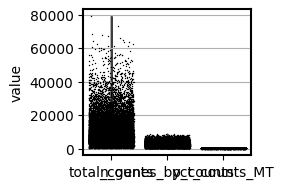

Plotting 1dpi QC violins...


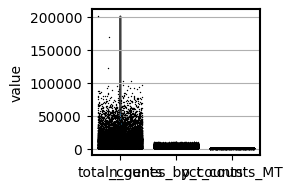

Plotting 2dpi QC violins...


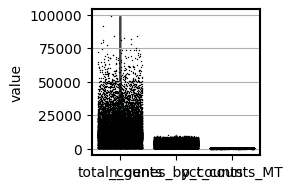

Plotting 3dpi QC violins...


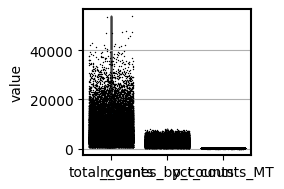

In [40]:
# Calculated and visualized the average number of genes that were detected at least once in each cell.
datasets = {
    "mock": mock_adata,
    "1dpi": day_one,
    "2dpi": day_two,
    "3dpi": day_three
}

for name, adata in datasets.items():
    print(f"Plotting {name} QC violins...")
    sc.pl.violin(
        adata,
        keys=['total_counts', 'n_genes_by_counts', 'pct_counts_MT'],
        jitter=0.4,
        multi_panel=False,
    )


Plotting mock QC Scatter colored by pct_counts_MT...


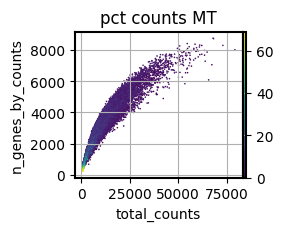

Plotting mock QC Scatter colored by pct_counts_RIBO...


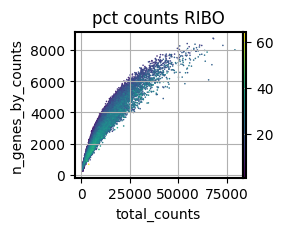

Plotting mock QC Scatter colored by pct_counts_HB...


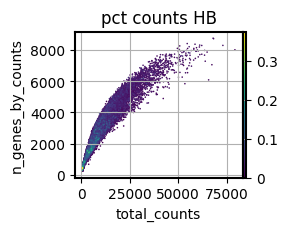

Plotting 1dpi QC Scatter colored by pct_counts_MT...


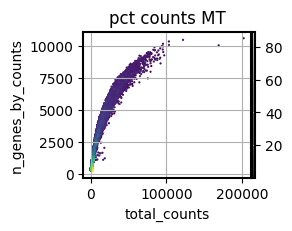

Plotting 1dpi QC Scatter colored by pct_counts_RIBO...


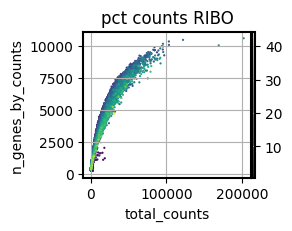

Plotting 1dpi QC Scatter colored by pct_counts_HB...


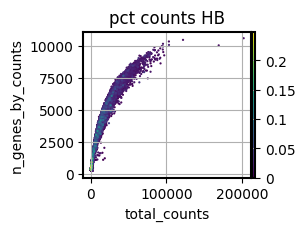

Plotting 2dpi QC Scatter colored by pct_counts_MT...


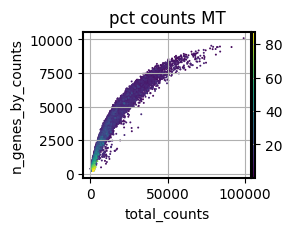

Plotting 2dpi QC Scatter colored by pct_counts_RIBO...


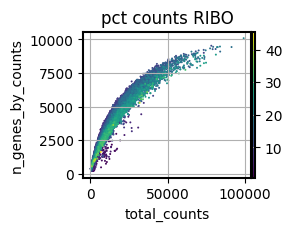

Plotting 2dpi QC Scatter colored by pct_counts_HB...


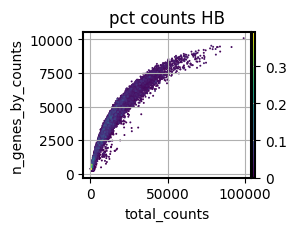

Plotting 3dpi QC Scatter colored by pct_counts_MT...


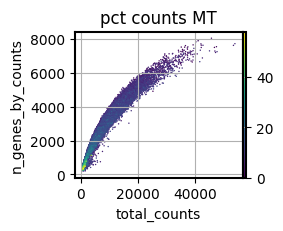

Plotting 3dpi QC Scatter colored by pct_counts_RIBO...


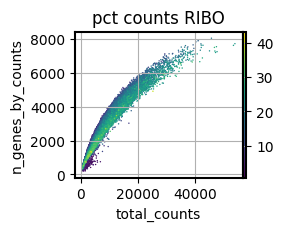

Plotting 3dpi QC Scatter colored by pct_counts_HB...


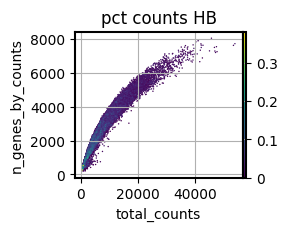

In [41]:
# Checked for stressed cells or potential doublets
# Cells with high mitochondrial % = likely stressed/dying
# Cells with high ribosomal % = may indicate technical artifacts
# Cells with high hemoglobin % = may indicate contamination from red blood cells
qc_colors = ['pct_counts_MT', 'pct_counts_RIBO', 'pct_counts_HB']

for name, adata in datasets.items():
    for color in qc_colors:
        print(f"Plotting {name} QC Scatter colored by {color}...")
        sc.pl.scatter(
            adata,
            x="total_counts",
            y="n_genes_by_counts",
            color=color,
            show=True
        )



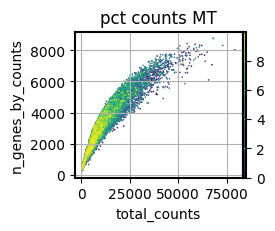

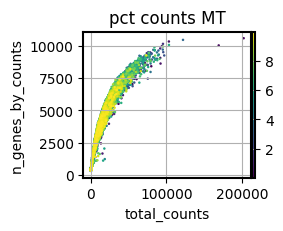

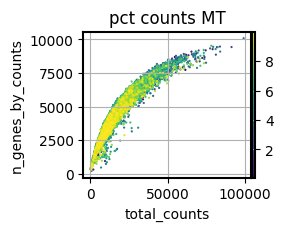

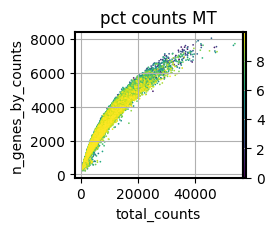

In [42]:
for name, adata in datasets.items():
    sc.pp.filter_genes(adata, min_cells=3)
    sc.pp.filter_cells(adata, min_genes=200)
    # removed stressed cells
    adata = adata[adata.obs.pct_counts_MT < 10]
    datasets[name] = adata
    sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts", color="pct_counts_MT")


In [36]:
for name, adata in datasets.items():
    print(f"Running Scrublet on {name}...")
    sc.pp.scrublet(adata,
    expected_doublet_rate=0.06,
    n_neighbors=30,
    use_approx_neighbors=True
)

Running Scrublet on mock...


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\preprocessing\_scrublet\__init__.py:295: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["doublet_score"] = scrubbed["obs"]["doublet_score"]


Running Scrublet on 1dpi...


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\preprocessing\_scrublet\__init__.py:295: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["doublet_score"] = scrubbed["obs"]["doublet_score"]


Running Scrublet on 2dpi...


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\preprocessing\_scrublet\__init__.py:295: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["doublet_score"] = scrubbed["obs"]["doublet_score"]


Running Scrublet on 3dpi...


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\preprocessing\_scrublet\__init__.py:295: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["doublet_score"] = scrubbed["obs"]["doublet_score"]


In [43]:
# Normalization
for name, adata in datasets.items():
    adata.layers["counts"] = adata.X.copy()
    sc.pp.normalize_total(adata)
    sc.pp.log1p(adata)

C:\Users\User\AppData\Local\Temp\ipykernel_17508\1377290366.py:3: ImplicitModificationWarning: Setting element `.layers['counts']` of view, initializing view as actual.
  adata.layers["counts"] = adata.X.copy()


Highly Variable Genes mock...


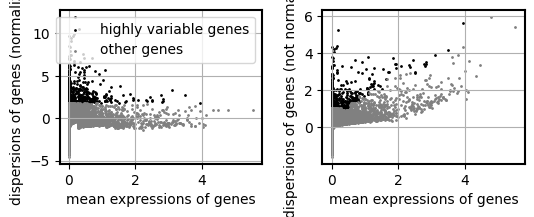

Highly Variable Genes 1dpi...


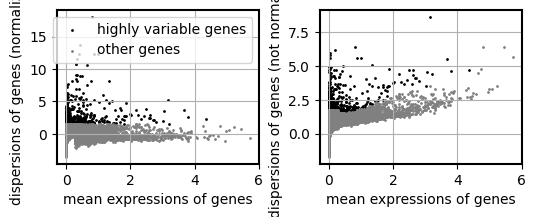

Highly Variable Genes 2dpi...


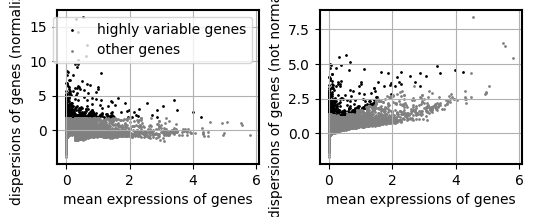

Highly Variable Genes 3dpi...


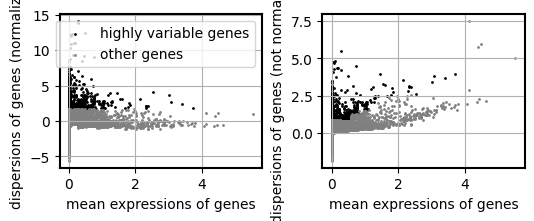

In [44]:
# Feature Selection
for name, adata in datasets.items():
    sc.pp.highly_variable_genes(adata, n_top_genes=1000)
    print(f"Highly Variable Genes {name}...")
    sc.pl.highly_variable_genes(adata)

Running PCA for mock...


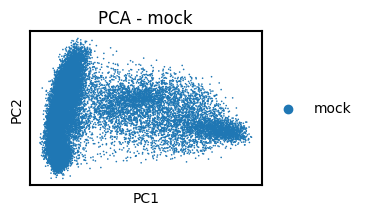

Running PCA for 1dpi...


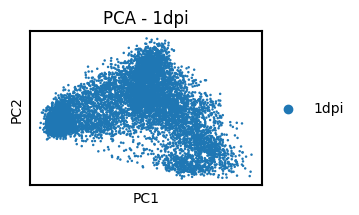

Running PCA for 2dpi...


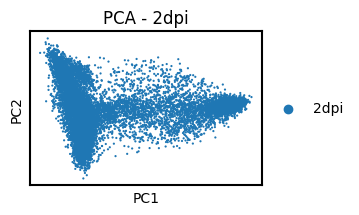

Running PCA for 3dpi...


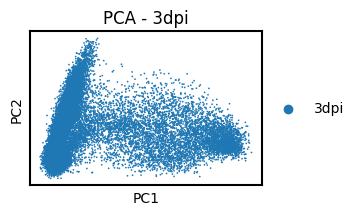

In [51]:
for name, adata in datasets.items():
    print(f"Running PCA for {name}...")
    sc.tl.pca(adata)
    sc.pl.pca(adata, color='condition', cmap="coolwarm", title=f"PCA - {name}")

In [50]:
for name, adata in datasets.items():
    adata.obs["condition"] = name
for name, adata in datasets.items():
    print(name, adata.obs.columns)



mock Index(['n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
       'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_MT',
       'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO',
       'log1p_total_counts_RIBO', 'pct_counts_RIBO', 'total_counts_HB',
       'log1p_total_counts_HB', 'pct_counts_HB', 'n_genes', 'condition'],
      dtype='object')
1dpi Index(['n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
       'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_MT',
       'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO',
       'log1p_total_counts_RIBO', 'pct_counts_RIBO', 'total_counts_HB',
       'log1p_total_counts_HB', 'pct_counts_HB', 'n_genes', 'condition'],
      dtype='object')
2d

Running neighbors + UMAP for mock...


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


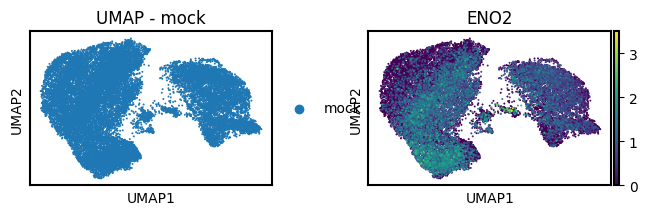

Running neighbors + UMAP for 1dpi...


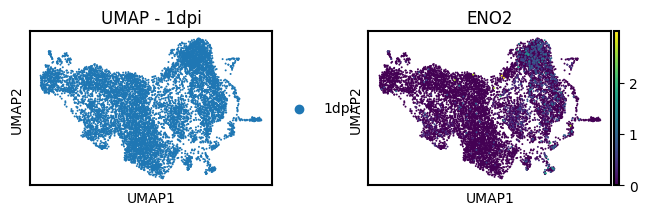

Running neighbors + UMAP for 2dpi...


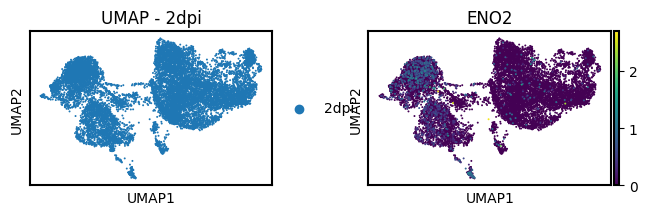

Running neighbors + UMAP for 3dpi...


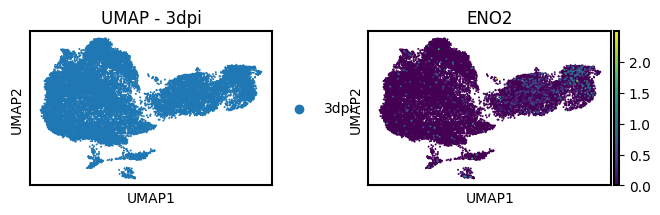

In [52]:
# Neighbor Detection
for name, adata in datasets.items():
    print(f"Running neighbors + UMAP for {name}...")
    sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
    sc.tl.umap(adata)
    sc.pl.umap(adata, color=["condition", 'ENO2'], size=8, title=f"UMAP - {name}")


In [53]:
mock_adata  = datasets["mock"]
day_one     = datasets["1dpi"]
day_two     = datasets["2dpi"]
day_three   = datasets["3dpi"]


In [54]:
# Further Clustering
sc.tl.leiden(mock_adata, flavor="igraph", n_iterations=10, key_added="leiden_res_", resolution=0.25)
sc.tl.leiden(day_one, flavor="igraph", n_iterations=10, key_added="leiden_res_", resolution=0.1)
sc.tl.leiden(day_two, flavor="igraph", n_iterations=10, key_added="leiden_res_", resolution=0.25)
sc.tl.leiden(day_three, flavor="igraph", n_iterations=10, key_added="leiden_res_", resolution=0.25)

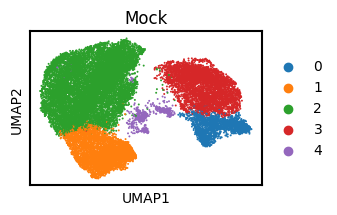

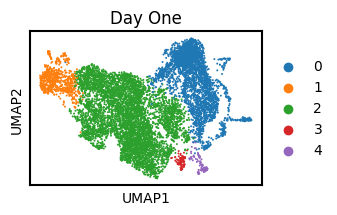

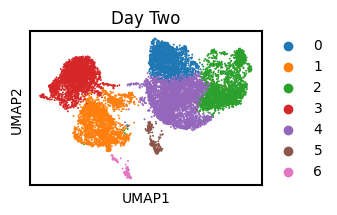

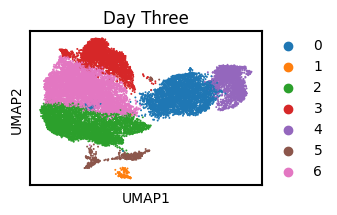

In [55]:
# Plot UMAP with Leiden clusters
sc.pl.umap(mock_adata,  color="leiden_res_", size=8, title="Mock")

sc.pl.umap(day_one,     color="leiden_res_", size=8, title="Day One")

sc.pl.umap(day_two,     color="leiden_res_", size=8, title="Day Two")

sc.pl.umap(day_three,   color="leiden_res_", size=8, title="Day Three")


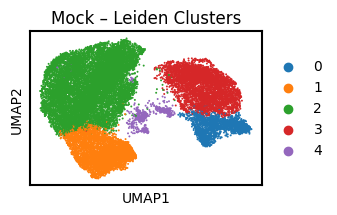

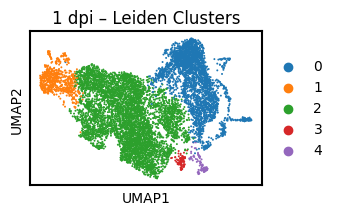

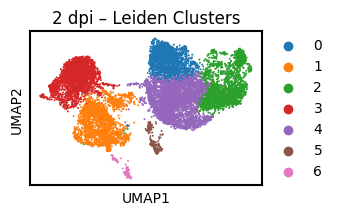

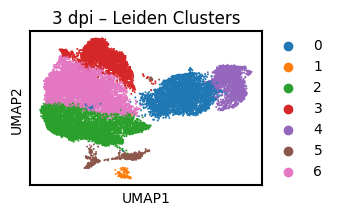

In [56]:
# Plot UMAP with Leiden clusters
sc.pl.umap(mock_adata, color="leiden_res_", size=8, title="Mock – Leiden Clusters")

sc.pl.umap(day_one, color="leiden_res_", size=8, title="1 dpi – Leiden Clusters")

sc.pl.umap(day_two, color="leiden_res_", size=8, title="2 dpi – Leiden Clusters")

sc.pl.umap(day_three, color="leiden_res_", size=8, title="3 dpi – Leiden Clusters")


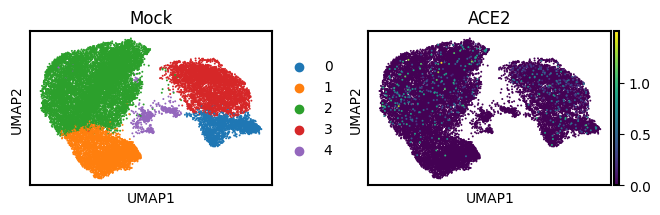

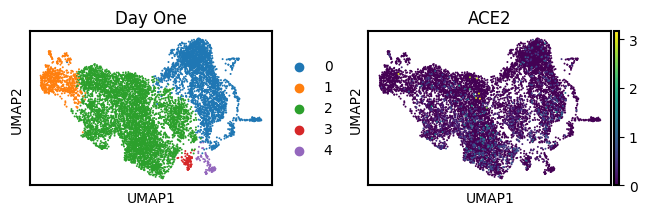

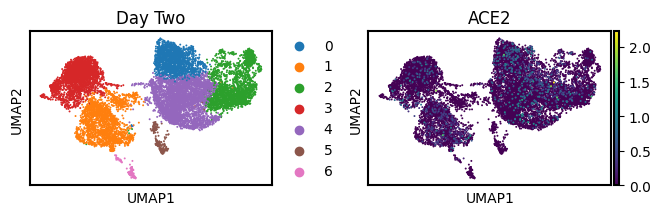

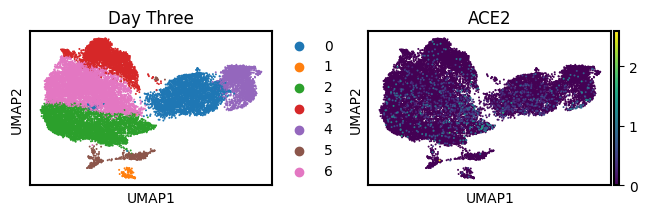

In [57]:
# Plot UMAP with Leiden clusters
sc.pl.umap(mock_adata, color=["leiden_res_", 'ACE2'], size=8, title="Mock")

sc.pl.umap(day_one, color=["leiden_res_", 'ACE2'], size=8, title="Day One")

sc.pl.umap(day_two, color=["leiden_res_", 'ACE2'], size=8, title="Day Two")

sc.pl.umap(day_three, color=["leiden_res_", 'ACE2'], size=8, title="Day Three")


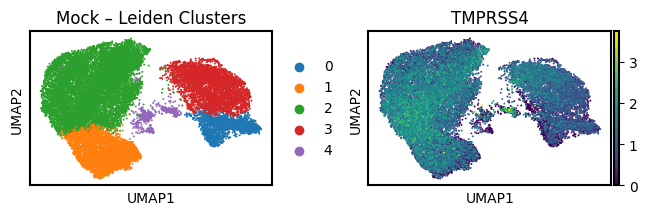

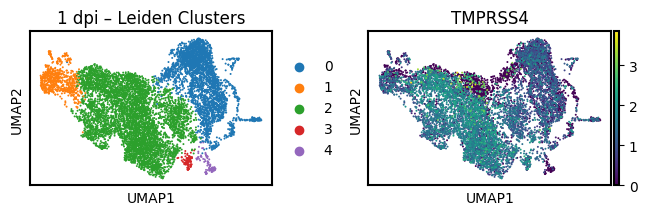

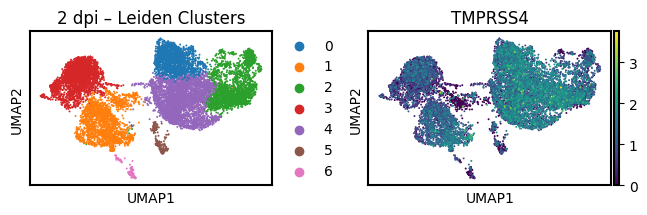

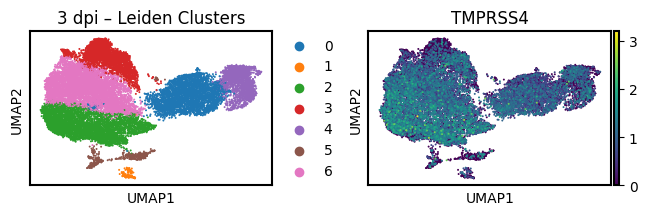

In [58]:
# Plot UMAP with Leiden clusters
sc.pl.umap(mock_adata, color=["leiden_res_", 'TMPRSS4'], size=8, title="Mock – Leiden Clusters")

sc.pl.umap(day_one, color=["leiden_res_", 'TMPRSS4'], size=8, title="1 dpi – Leiden Clusters")

sc.pl.umap(day_two, color=["leiden_res_", 'TMPRSS4'], size=8, title="2 dpi – Leiden Clusters")

sc.pl.umap(day_three, color=["leiden_res_", 'TMPRSS4'], size=8, title="3 dpi – Leiden Clusters")


In [59]:
# Cell Type Annotation
import decoupler as dc
# Query Omnipath and get PanglaoDB
markers = dc.op.resource(name="PanglaoDB", organism="human")

# Keep canonical cell type markers alone
#markers = markers[markers["canonical_marker"]]

# Remove duplicated entries
markers = markers[~markers.duplicated(["cell_type", "genesymbol"])]

#Format because dc only accepts cell_type and genesymbol

markers = markers.rename(columns={"cell_type": "source", "genesymbol": "target"})
markers = markers[["source", "target"]]


markers.head()

,source,target
,,
0,Hepatocytes,A1CF
1,Germ cells,A2APA5
2,Bergmann glia,A2M
3,Mast cells,A3FIN4
4,Mast cells,A4GALT


In [60]:
#load the gene expression matrix into dc

dc.mt.ulm(data=mock_adata, net=markers, tmin = 3)
dc.mt.ulm(data=day_one, net=markers, tmin = 3)    
dc.mt.ulm(data=day_two, net=markers, tmin = 3)
dc.mt.ulm(data=day_three, net=markers, tmin = 3)

#retrieve the score for each cell type

score_mock = dc.pp.get_obsm(mock_adata, key="score_ulm")
score_1 = dc.pp.get_obsm(day_one, key="score_ulm")
score_2 = dc.pp.get_obsm(day_two, key="score_ulm")
score_3 = dc.pp.get_obsm(day_three, key="score_ulm")

In [ ]:
# rank genes for each cluster
# mock genes
mock_adata_gene_rank = dc.tl.rankby_group(
    score_mock,
    groupby="leiden_res_",
    reference="rest",
    method="t-test_overestim_var"
)
mock_adata_gene_rank = mock_adata_gene_rank[mock_adata_gene_rank["stat"] > 0]
mock_adata_gene_rank.head(5)

# day one genes
day_one_gene_rank = dc.tl.rankby_group(
    score_1,
    groupby="leiden_res_",
    reference="rest",
    method="t-test_overestim_var"
)
day_one_gene_rank = day_one_gene_rank[day_one_gene_rank["stat"] > 0]
day_one_gene_rank.head(5)

# day two genes
day_two_gene_rank = dc.tl.rankby_group(
    score_2,
    groupby="leiden_res_",
    reference="rest",
    method="t-test_overestim_var"
)
day_two_gene_rank = day_two_gene_rank[day_two_gene_rank["stat"] > 0]
day_two_gene_rank.head(5)

# day three genes
day_three_gene_rank = dc.tl.rankby_group(
    score_3,
    groupby="leiden_res_",
    reference="rest",
    method="t-test_overestim_var"
)
day_three_gene_rank = day_three_gene_rank[day_three_gene_rank["stat"] > 0]
day_three_gene_rank.head(5)



,group,reference,name,stat,meanchange,pval,padj
0,0,rest,Ependymal cells,68.051931,3.783687,0.000000e+00,0.000000e+00
1,0,rest,Olfactory epithelial cells,61.040918,2.423914,0.000000e+00,0.000000e+00
2,0,rest,Ciliated cells,59.050782,2.638411,0.000000e+00,0.000000e+00
3,0,rest,Germ cells,54.642950,1.804756,0.000000e+00,0.000000e+00
8,0,rest,Thymocytes,38.628591,0.692946,1.364766e-295,2.623383e-294


In [63]:
# mock
top_cell_type_per_group_mock = mock_adata_gene_rank.groupby("group")['name'].apply(lambda x: x.head(1))
display(top_cell_type_per_group_mock.to_dict())

# day one
top_cell_type_per_group_day_one = day_one_gene_rank.groupby("group")['name'].apply(lambda x: x.head(1))
display(top_cell_type_per_group_day_one.to_dict())

# day two
top_cell_type_per_group_day_two = day_two_gene_rank.groupby("group")['name'].apply(lambda x: x.head(1))
display(top_cell_type_per_group_day_two.to_dict())

# day three
top_cell_type_per_group_day_three = day_three_gene_rank.groupby("group")['name'].apply(lambda x: x.head(1))
display(top_cell_type_per_group_day_three.to_dict())

C:\Users\User\AppData\Local\Temp\ipykernel_17508\1959499853.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_cell_type_per_group_mock = mock_adata_gene_rank.groupby("group")['name'].apply(lambda x: x.head(1))


{('0', 0): 'Olfactory epithelial cells',
 ('1', 172): 'Myoepithelial cells',
 ('2', 344): 'Luminal epithelial cells',
 ('3', 516): 'Ependymal cells',
 ('4', 697): 'Neurons'}

C:\Users\User\AppData\Local\Temp\ipykernel_17508\1959499853.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_cell_type_per_group_day_one = day_one_gene_rank.groupby("group")['name'].apply(lambda x: x.head(1))


{('0', 0): 'Germ cells',
 ('1', 172): 'Myoepithelial cells',
 ('2', 344): 'Luminal epithelial cells',
 ('3', 516): 'Undefined placental cells',
 ('4', 688): 'Enteroendocrine cells'}

C:\Users\User\AppData\Local\Temp\ipykernel_17508\1959499853.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_cell_type_per_group_day_two = day_two_gene_rank.groupby("group")['name'].apply(lambda x: x.head(1))


{('0', 0): 'Cholangiocytes',
 ('1', 172): 'Ciliated cells',
 ('2', 344): 'Keratinocytes',
 ('3', 516): 'Ependymal cells',
 ('4', 688): 'Ionocytes',
 ('5', 866): 'Intercalated cells',
 ('6', 1032): 'Merkel cells'}

C:\Users\User\AppData\Local\Temp\ipykernel_17508\1959499853.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_cell_type_per_group_day_three = day_three_gene_rank.groupby("group")['name'].apply(lambda x: x.head(1))


{('0', 0): 'Ependymal cells',
 ('1', 173): 'Immature neurons',
 ('2', 346): 'Cholangiocytes',
 ('3', 519): 'Myoepithelial cells',
 ('4', 692): 'Germ cells',
 ('5', 871): 'T cytotoxic cells',
 ('6', 1038): 'Keratinocytes'}

In [11]:
import decoupler as dc
print(dc.__version__)


2.1.2
